Chapter 09

# 超椭圆
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码在二维平面上展示了不同的$L_p$空间的等高线图。$L_p$空间的度量定义为：

$$
\left( \left| \frac{x_1}{a} \right|^p + \left| \frac{x_2}{b} \right|^q \right)^{\frac{1}{q}} = 1
$$

其中，参数$p$和$q$影响空间的形状，$a$和$b$是常数。在此代码中，$p$和$q$分别取值$\{0.5, 1, 2, 3\}$，遍历所有可能的$(p, q)$组合，每一组合对应$L_p$度量空间的一种形状。

代码通过子图网格绘制每组$(p, q)$的$L_p$等高线图，将每个子图表示不同的$L_p$空间。对于每个子图中的$L_p$度量：
- 当$p$或$q$趋近较小值（如0.5）时，曲线更加平滑、接近圆形；
- 当$p$和$q$增大时，空间边界逐渐变成菱形或矩形；
- 特别地，当$p$或$q$为无穷大时，等距曲线的边界接近方形。

在图中，彩色等高线表示不同的$L_p$空间度量值变化，黑色实线轮廓表示$L_p = 1$的边界。子图的标题标注了对应的$p$和$q$值，这样通过可视化清晰展示了$L_p$空间随参数变化的几何特性。最终图形完整展现了不同参数组合下的$L_p$度量空间的形状演变，使其在不同条件下的形状特征一目了然。

## 导入所需库

In [1]:
import matplotlib.pyplot as plt  # 导入matplotlib库用于绘图
import numpy as np  # 导入numpy库用于数值计算

## 定义Lp空间的参数

In [2]:
a = 1  # Lp空间的参数a
b = 1  # Lp空间的参数b

p = [0.5, 1, 2, 3]  # 定义p的取值列表
q = p  # 定义q的取值列表

pp, qq = np.meshgrid(p, q)  # 创建p和q的网格
pp = pp.flatten()  # 将p网格展平成一维数组
qq = qq.flatten()  # 将q网格展平成一维数组

x1 = np.linspace(-2, 2, num=101)  # x1轴坐标范围
x2 = x1  # x2轴坐标范围

xx1, xx2 = np.meshgrid(x1, x2)  # 生成二维网格

## 创建子图

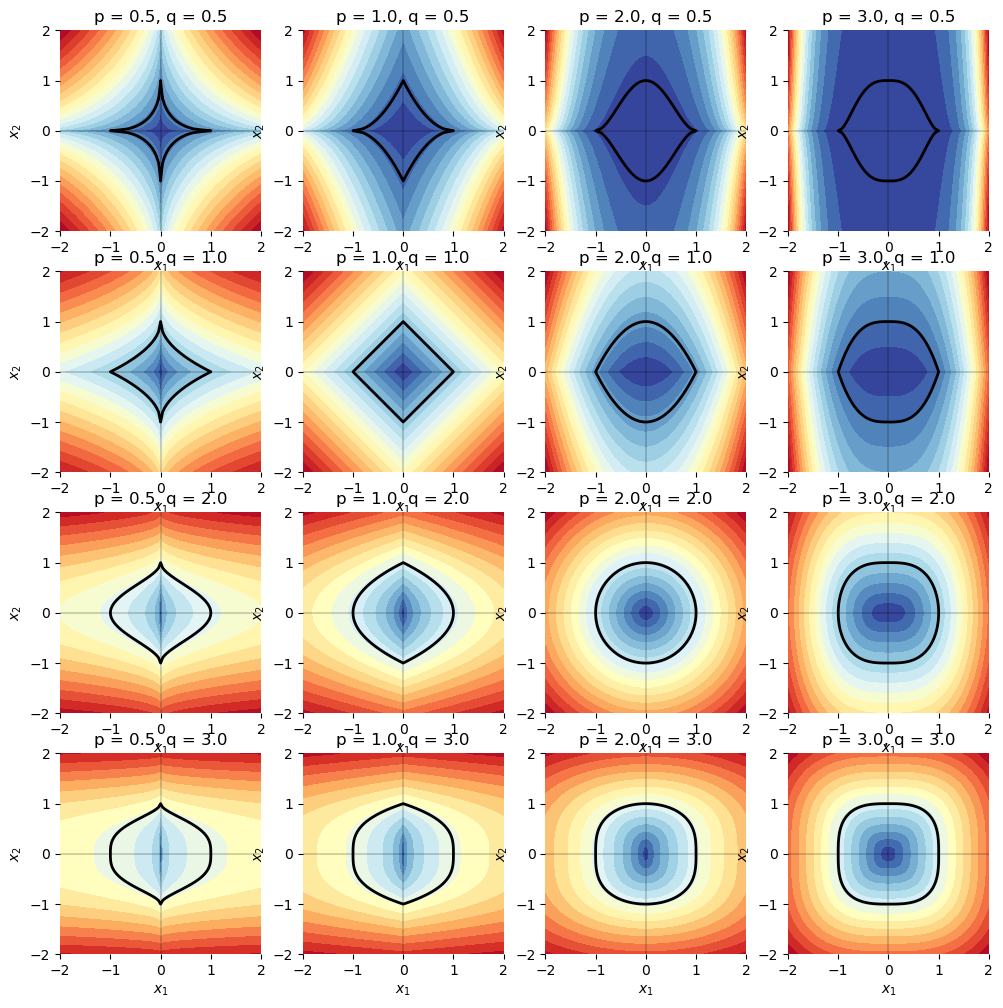

In [3]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(12, 12))  # 创建4x4的子图网格

## 遍历每组p和q值，绘制Lp空间的等高线图
for p, q, ax in zip(pp, qq, axes.flat):
    
    if np.isinf(p):  # 当p为无穷大时，计算Lp空间的等值线
        zz = np.maximum(np.abs(xx1/a), np.abs(xx2/b))
    else:
        zz = ((np.abs((xx1/a))**p) + (np.abs((xx2/b))**q))**(1./q)  # 计算Lp空间

    ax.contourf(xx1, xx2, zz, 20, cmap='RdYlBu_r')  # 绘制Lp空间的填充等高线
    ax.contour(xx1, xx2, zz, [1], colors='k', linewidths=2)  # 绘制Lp = 1的等值线

    ## 设置装饰和样式
    ax.axhline(y=0, color='k', linewidth=0.25)  # 添加y轴
    ax.axvline(x=0, color='k', linewidth=0.25)  # 添加x轴
    ax.set_xlim(-2, 2)  # 设置x轴范围
    ax.set_ylim(-2, 2)  # 设置y轴范围
    ax.spines['top'].set_visible(False)  # 隐藏顶部边框
    ax.spines['right'].set_visible(False)  # 隐藏右侧边框
    ax.spines['bottom'].set_visible(False)  # 隐藏底部边框
    ax.spines['left'].set_visible(False)  # 隐藏左侧边框
    ax.set_xlabel('$x_1$')  # 设置x轴标签
    ax.set_ylabel('$x_2$')  # 设置y轴标签
    ax.set_title('p = ' + str(p) + ', q = ' + str(q))  # 设置标题，显示p和q的值
    ax.set_aspect('equal', adjustable='box')  # 设置坐标轴比例

plt.show()  # 显示图形